In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [196]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [197]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [199]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [200]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [201]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [202]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA

In [203]:
def change(col):
    if col=="Yes":
        return 1
    if col=="No":
        return 0

In [204]:
df['Churn']=df['Churn'].apply(change)

Male      3555
Female    3488
Name: gender, dtype: int64

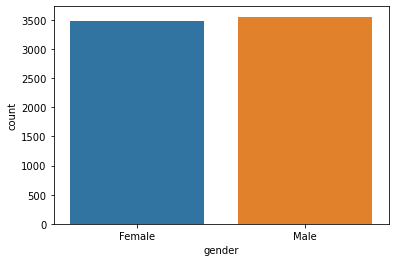

In [205]:
sns.countplot(df['gender'])
df['gender'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

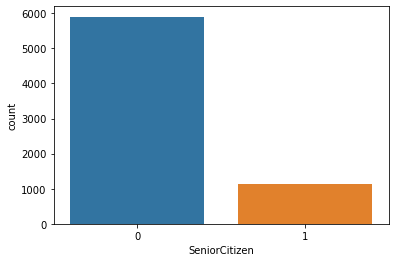

In [206]:
sns.countplot(df['SeniorCitizen'])
df['SeniorCitizen'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

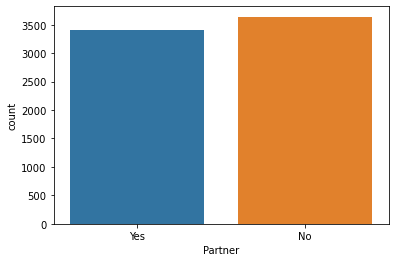

In [207]:
sns.countplot(df['Partner'])
df['Partner'].value_counts()

<AxesSubplot:xlabel='tenure', ylabel='Density'>

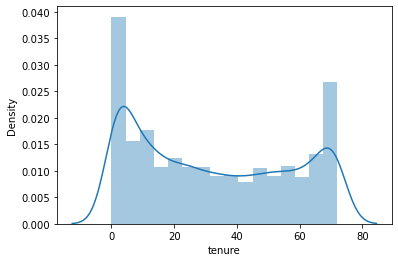

In [208]:
sns.distplot(df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

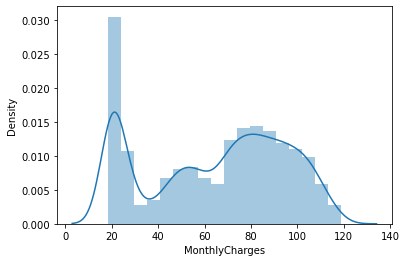

In [209]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

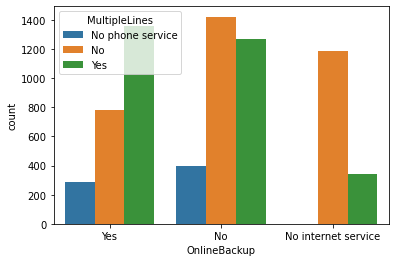

In [210]:
sns.countplot(df['OnlineBackup'],hue=df['MultipleLines'])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

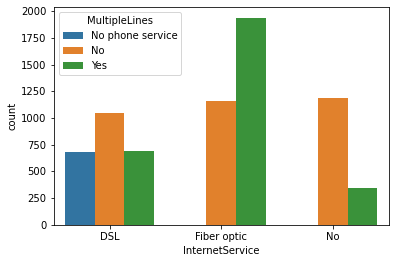

In [211]:
sns.countplot(df['InternetService'],hue=df['MultipleLines'])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

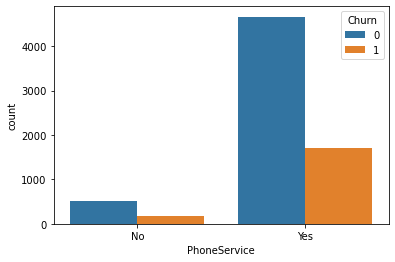

In [212]:
sns.countplot('PhoneService',hue='Churn',data=df)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

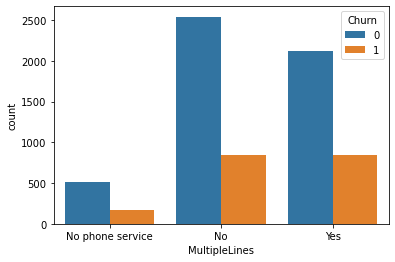

In [213]:
sns.countplot('MultipleLines',hue='Churn',data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

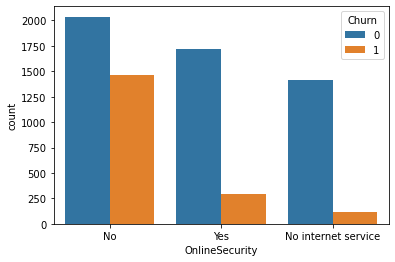

In [214]:
sns.countplot('OnlineSecurity',hue='Churn',data=df)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

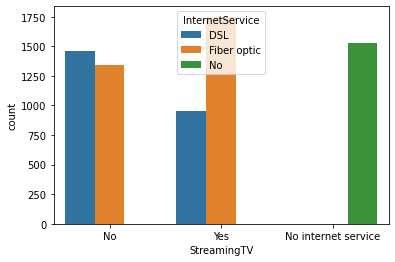

In [215]:
sns.countplot('StreamingTV',hue='InternetService',data=df)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

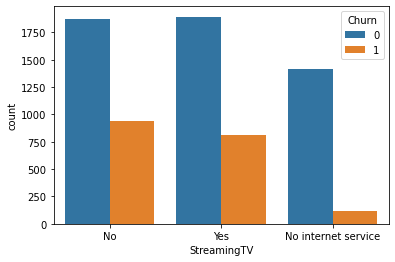

In [216]:
sns.countplot('StreamingTV',hue='Churn',data=df)

([<matplotlib.patches.Wedge at 0x1cc8d05c1c0>,
 [Text(-0.9603414027015803, 0.5364181114179138, 'Not- Senior'),
  Text(0.9603414278131233, -0.5364180664610878, 'Senior')],
 [Text(-0.523822583291771, 0.29259169713704386, '83.79%'),
  Text(0.5238225969889763, -0.29259167261513874, '16.21%')])

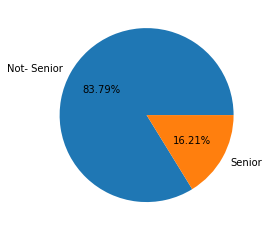

In [217]:
plt.pie((df['SeniorCitizen'].value_counts(normalize=True)*100).values,labels=['Not- Senior','Senior'],autopct='%1.2f%%')

Phone service 

([<matplotlib.patches.Wedge at 0x1cc8e269370>,
 [Text(-1.0494915966975706, 0.3294956577273573, 'Phone Service Used'),
  Text(1.049491627547176, -0.32949555946686127, 'Not used')],
 [Text(-0.5724499618350385, 0.17972490421492215, '90.32%'),
  Text(0.5724499786620959, -0.17972485061828794, '9.68%')])

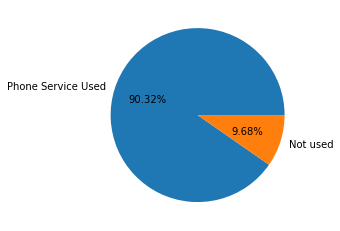

In [218]:
plt.pie(df['PhoneService'].value_counts().values,labels=['Phone Service Used','Not used'],autopct='%1.2f%%')

Online security

([<matplotlib.patches.Wedge at 0x1cc8e2aba60>,
 [Text(0.011530382742536482, 1.0999395666461913, 'No'),
  Text(-0.7011814628356199, -0.8475520964375585, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.006289299677747172, 0.5999670363524678, '49.67%'),
  Text(-0.38246261609215626, -0.46230114351139545, '28.67%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

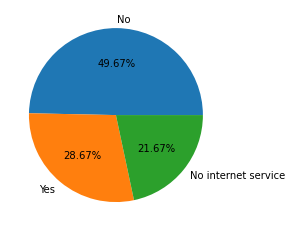

In [219]:
plt.pie(df['OnlineSecurity'].value_counts().values,labels=df['OnlineSecurity'].value_counts().index,autopct='%1.2f%%')

Device protection

([<matplotlib.patches.Wedge at 0x1cc8a038ca0>,
 [Text(0.20800849946792185, 1.080153907621087, 'No'),
  Text(-0.8414211562608911, -0.7085269492380549, 'Yes'),
  Text(0.8548553357827734, -0.692258878515633, 'No internet service')],
 [Text(0.11345918152795736, 0.589174858702411, '43.94%'),
  Text(-0.45895699432412235, -0.386469245038939, '34.39%'),
  Text(0.46628472860878545, -0.3775957519176179, '21.67%')])

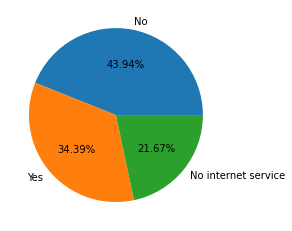

In [220]:
plt.pie(df['DeviceProtection'].value_counts().values,labels=df['DeviceProtection'].value_counts().index,autopct='%1.2f%%')

Streaming TV

([<matplotlib.patches.Wedge at 0x1cc8a30c0d0>,
 [Text(0.3432768520552361, 1.0450650711046885, 'No'),
  Text(-0.9244614473012523, -0.5961300465952661, 'Yes'),
  Text(0.8548553357827734, -0.692258878515633, 'No internet service')],
 [Text(0.18724191930285602, 0.5700354933298301, '39.90%'),
  Text(-0.5042516985279557, -0.3251618435974179, '38.44%'),
  Text(0.46628472860878545, -0.3775957519176179, '21.67%')])

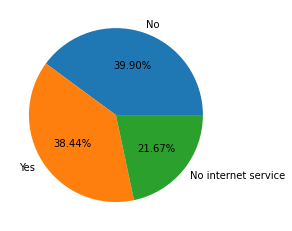

In [221]:
plt.pie(df['StreamingTV'].value_counts().values,labels=df['StreamingTV'].value_counts().index,autopct='%1.2f%%')

Streaming movies

([<matplotlib.patches.Wedge at 0x1cc8e2b6e50>,
 [Text(0.3549092210143265, 1.0411721494733732, 'No'),
  Text(-0.9310514684948953, -0.5857842290583618, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.19358684782599625, 0.5679120815309308, '39.54%'),
  Text(-0.50784625554267, -0.31951867039547005, '38.79%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

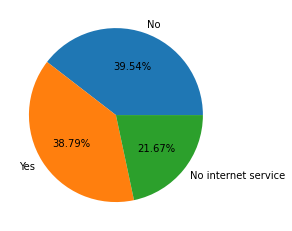

In [222]:
plt.pie(df['StreamingMovies'].value_counts().values,labels=df['StreamingMovies'].value_counts().index,autopct='%1.2f%%')

Paperless Billing 

([<matplotlib.patches.Wedge at 0x1cc8e734dc0>,
 [Text(-0.31424730634794096, 1.0541577825226467, 'Yes'),
  Text(0.31424730634794035, -1.0541577825226467, 'No')],
 [Text(-0.17140762164433143, 0.5749951541032617, '59.22%'),
  Text(0.1714076216443311, -0.5749951541032617, '40.78%')])

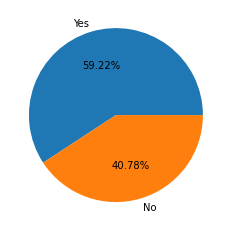

In [223]:
plt.pie(df['PaperlessBilling'].value_counts().values,labels=df['PaperlessBilling'].value_counts().index,autopct='%1.2f%%')

Payment Method

([<matplotlib.patches.Wedge at 0x1cc8e778e50>,
 [Text(0.5426181731482101, 0.956851878907754, 'Electronic check'),
  Text(-1.0466614167922357, 0.33837830692653775, 'Mailed check'),
  Text(-0.5037781622923265, -0.9778586621784185, 'Bank transfer (automatic)'),
  Text(0.8560892632593112, -0.690732345653604, 'Credit card (automatic)')],
 [Text(0.2959735489899328, 0.5219192066769567, '33.58%'),
  Text(-0.5709062273412193, 0.18456998559629328, '22.89%'),
  Text(-0.27478808852308717, -0.5333774520973191, '21.92%'),
  Text(0.46695777995962423, -0.3767630976292385, '21.61%')])

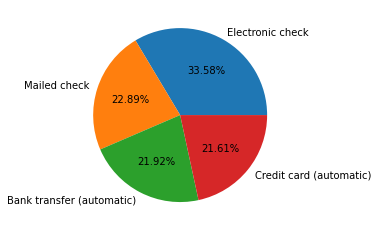

In [224]:
plt.pie(df['PaymentMethod'].value_counts().values,labels=df['PaymentMethod'].value_counts().index,autopct='%1.2f%%')

In [225]:
df.drop(['gender','PhoneService','Contract','TotalCharges','MultipleLines','customerID'],axis=1,inplace=True)

In [226]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,0
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,0
7040,0,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Yes,Electronic check,29.60,0
7041,1,Yes,No,4,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,74.40,1


In [227]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


cat_features = ['SeniorCitizen','Partner','Dependents','InternetService','OnlineSecurity',
                'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                'StreamingMovies','PaperlessBilling','PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [228]:
sc=MinMaxScaler()
t=sc.fit_transform(df[['tenure']])
month_charge=sc.fit_transform(df[['MonthlyCharges']])

In [229]:
X['tenure']=t
X['MonthlyCharges']=month_charge

In [230]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Resampling

Text(0.5, 1.0, 'before resampling')

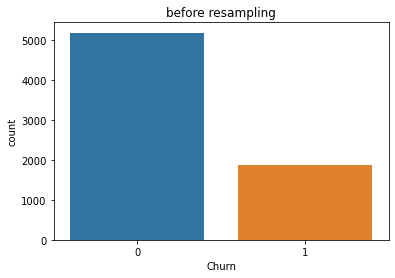

In [231]:
sns.countplot(data=df,x='Churn').set_title("before resampling")

In [232]:
churn1=X[X.Churn==1]
churn0=X[X.Churn==0]

In [233]:
print(len(churn1),len(churn0))

1869 5174


In [234]:
churn1_upsampled = churn1.sample(n=len(churn0), replace=True, random_state=40)
print(len(churn1_upsampled))

5174


In [235]:
ch_upsampled = churn0.append(churn1_upsampled).reset_index(drop=True)
print(len(ch_upsampled))

10348


Text(0.5, 1.0, 'after resampling')

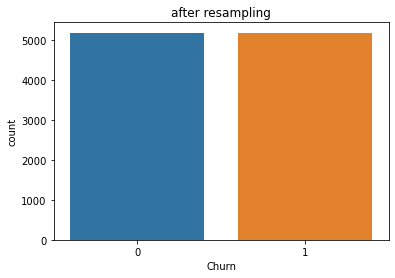

In [236]:
sns.countplot(data=ch_upsampled,x='Churn').set_title("after resampling")

In [237]:
X.shape

(7043, 24)

# Machine Learning Model

Train & Test Split

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
x = ch_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = ch_upsampled['Churn'] #target (dependent variable)

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2,random_state=100)

Logistic Regression

In [241]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train,Y_train)

LogisticRegression()

In [242]:
lr_pred=lr.predict(X_test)

In [243]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [246]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [247]:
lr_pred[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [248]:
confusion_matrix(Y_test,lr_pred)

array([[804, 219],
       [247, 800]], dtype=int64)

In [249]:
accuracy_score(Y_test,lr_pred)*100 

77.487922705314

In [250]:
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1023
           1       0.79      0.76      0.77      1047

    accuracy                           0.77      2070
   macro avg       0.78      0.78      0.77      2070
weighted avg       0.78      0.77      0.77      2070



Decision Trees

In [251]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [252]:
dt_pred = dtree.predict(X_test)

In [253]:
Y_test[:10]

8282     1
9970     1
10070    1
8398     1
7310     1
3269     0
10132    1
7055     1
2429     0
10155    1
Name: Churn, dtype: int64

In [254]:
dt_pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [255]:
confusion_matrix(Y_test,dt_pred)

array([[834, 189],
       [ 72, 975]], dtype=int64)

In [256]:
accuracy_score(Y_test,dt_pred)*100 

87.39130434782608

In [257]:
print(classification_report(Y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1023
           1       0.84      0.93      0.88      1047

    accuracy                           0.87      2070
   macro avg       0.88      0.87      0.87      2070
weighted avg       0.88      0.87      0.87      2070



Random Forest

In [259]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [260]:
rf_pred = rfc.predict(X_test)

In [261]:
Y_test[:10]

8282     1
9970     1
10070    1
8398     1
7310     1
3269     0
10132    1
7055     1
2429     0
10155    1
Name: Churn, dtype: int64

In [262]:
rf_pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [264]:
confusion_matrix(Y_test,rf_pred)

array([[879, 144],
       [ 56, 991]], dtype=int64)

In [265]:
accuracy_score(Y_test,rf_pred)*100 

90.33816425120773

In [266]:
print(classification_report(Y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1023
           1       0.87      0.95      0.91      1047

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.91      0.90      0.90      2070



So we get the accuracy of our model as 90.14% which is much better than other algorithm models.